1. Рещить задачу классификации ирисов Фишера (Virginica и Sentosa).
2. Определить параметры качества классификации:
- ошибки 1 и 2 рода,
- вероятность правильного распознавания,
- чувствительность и специфичность.
3. Визуализировать обучающую и тестовую выборки данных.
Вариант 1: методом бинарных деревьев



1) Setting all essential libraries and add the dataset 'iris'

In [52]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

array_iris = pd.read_csv('/kaggle/input/iris/Iris.csv')
array_iris.drop(array_iris[array_iris['Species'] == "Iris-versicolor"].index, inplace=True) #remove iris-versicolor
array_iris.iloc[:,1:6] #check dataset

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


2) Learning program. Generate the values for further training and improving

In [53]:
x = array_iris.iloc[:, 1:5].values # saving in X all values of rows and 1 - 5 columns
y = array_iris.iloc[:, 5].values # saving in Y all values of rows and only 5 column

print(type(x), type(y))

# the next command split array into random test subsets
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.20)

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


3)Increasing objects using the function StandartScaler from the module sklearm 

In [54]:
scaler = StandardScaler()
scaler.fit(X_train) # Compute the mean and std to be used for later scaling

# Perform standardization by centering and scaling
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
print(type(X_train))

<class 'numpy.ndarray'>


4) Build test and training plots

<AxesSubplot:xlabel='SepalLengthCm', ylabel='PetalLengthCm'>

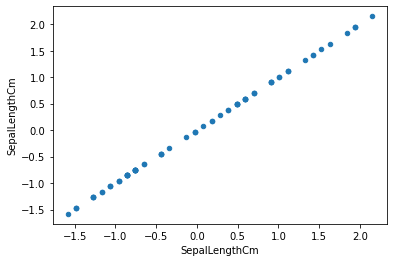

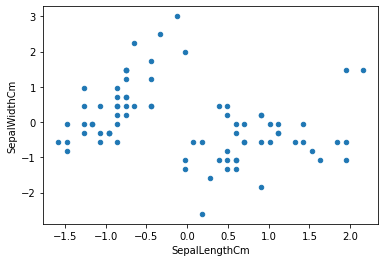

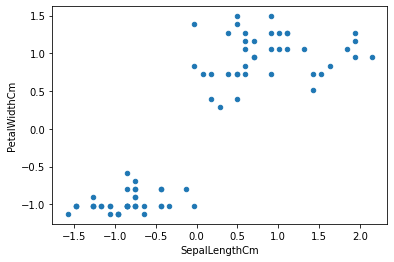

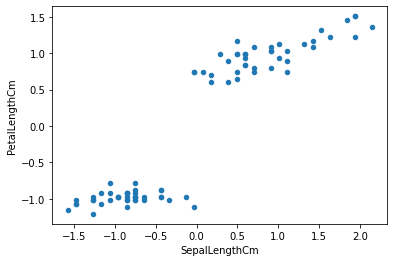

In [55]:
set_train = pd.DataFrame(X_train, columns=array_iris.columns[1:5])

set_train.plot.scatter(x="SepalLengthCm",y="SepalLengthCm", s=20)
set_train.plot.scatter(x="SepalLengthCm",y="SepalWidthCm", s=20)
set_train.plot.scatter(x="SepalLengthCm",y="PetalWidthCm", s=20)
set_train.plot.scatter(x="SepalLengthCm",y="PetalLengthCm", s=20)


<AxesSubplot:xlabel='SepalLengthCm', ylabel='PetalLengthCm'>

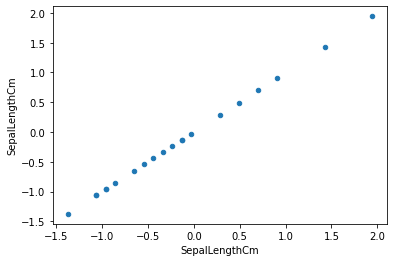

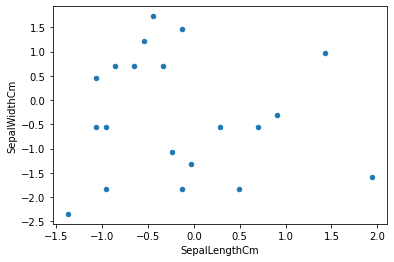

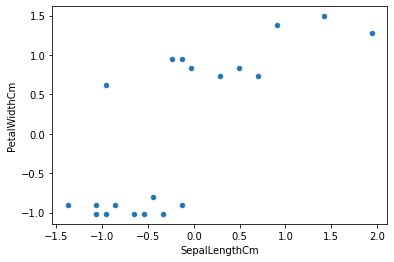

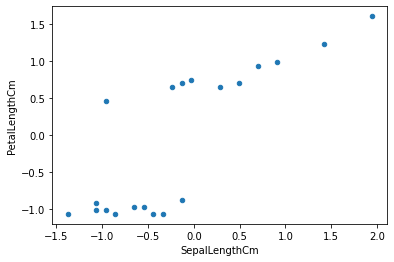

In [56]:
set_test = pd.DataFrame(X_test, columns=array_iris.columns[1:5])

set_test.plot.scatter(x="SepalLengthCm",y="SepalLengthCm", s=20)
set_test.plot.scatter(x="SepalLengthCm",y="SepalWidthCm", s=20)
set_test.plot.scatter(x="SepalLengthCm",y="PetalWidthCm", s=20)
set_test.plot.scatter(x="SepalLengthCm",y="PetalLengthCm", s=20)

5) Trees model
In the library skleanr there is an implementation of a decision tree which is included in class DecisionThreeClassifier. Using the method 'fit' we will teach our model

In [57]:
trees_model = DecisionTreeClassifier()
# Build a decision tree classifier from the training set (X, y)
trees_model.fit(X_train, Y_train) 


DecisionTreeClassifier()

The mean score: 100.0 %
Confusion Matrix


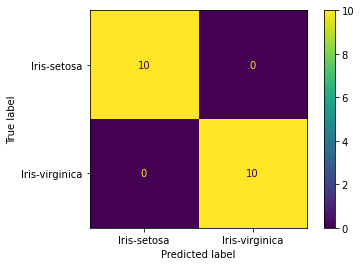

In [58]:
# Predict class or regression value for X test
y_predict = trees_model.predict(X_test)

#
confusion_m = confusion_matrix(Y_test, y_predict)
disp = ConfusionMatrixDisplay(confusion_matrix = confusion_m, display_labels = trees_model.classes_)
disp.plot()

# Return the mean accuracy on the given test data and labels
print(f'The mean score: {trees_model.score(X_test, Y_test) * 100} %') 
print("Confusion Matrix")
plt.show()

6) In a result, we've got values sensitivity and specificity for solution

In [59]:
sensitivity = confusion_m[0,0]/(confusion_m[0,0] + confusion_m[0,1])
print(f'Sensitivity value = {sensitivity}')

specificity = confusion_m[1,1]/(confusion_m[1,0] + confusion_m[1,1])
print(f'Specificity value  = {specificity}')

Sensitivity value = 1.0
Specificity value  = 1.0
